In [22]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
import os 

In [23]:
def short_term_energy(frame):
    return np.sum(frame**2) / (frame.shape[0])

In [24]:
def gaussian_filter(histogram):
    return 

In [25]:

def voice_segment(signal, frame_size, attribute_function):
    start = 0
    end = frame_size
    value = []
    while end < signal.shape[0]:
        temp_frame = np.float64(signal[start:end])
        value.append(eval(f"{attribute_function}(temp_frame)"))
        start += frame_size
        end += frame_size
    return value

In [26]:
def iterator_for_all_sub_directories(directory):
    files_path = {"a.wav": [], "e.wav": [], "i.wav": [], "o.wav": [], "u.wav": []}
    for sub_directory in os.scandir(directory):
        for file in os.scandir(sub_directory):
            splitted_file_path = file.path.split("/")
            files_path[splitted_file_path[-1]].append(file.path)
    return files_path

In [27]:
def argmax(y):
    max = 0
    max_index = 0
    for i in range(len(y)):
        if y[i] > max:
            max_index = i
            max = y[i]
    return max_index

In [28]:
def get_unique_values(values):
    result = []
    for value in values:
        if value not in result:
            result.append(value)
    return result

In [29]:
def histogram(values):
    result = []
    histogram_features = get_unique_values(values)
    for value in histogram_features:
        result.append(values.count(value))
    return result

In [30]:
def histogram_function(w, m1, m2):
    return ((w * m1) + m2) / (w + 1)

In [31]:
SAMPLE_DIR = r'/home/viethung/DSP/VowelRegconition/NguyenAmHuanLuyen-16k'

In [32]:
sample_rate, signal = wavfile.read('/home/viethung/DSP/VowelRegconition/NguyenAmHuanLuyen-16k/01MDA/a.wav')
normalized_signal = signal / np.max(signal)

Text(0.5, 1.0, 'Input Signal')

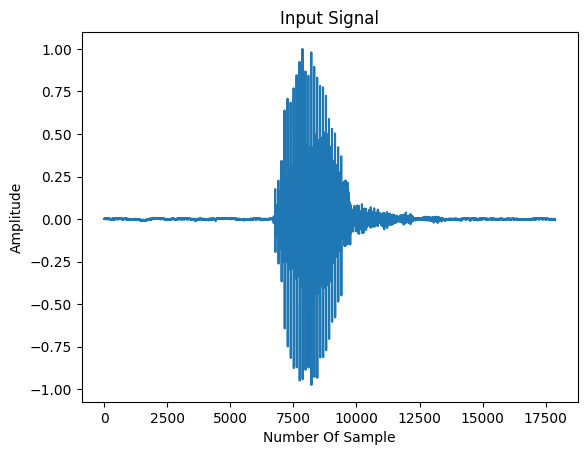

In [33]:
plt.plot(np.arange(normalized_signal.shape[0]), normalized_signal)
plt.xlabel("Number Of Sample")
plt.ylabel("Amplitude")
plt.title("Input Signal")

In [34]:
frame_size = int(0.03 * sample_rate)
ste_value = voice_segment(normalized_signal, frame_size, "short_term_energy") 

Text(0.5, 1.0, 'STE OF A SIGNAL')

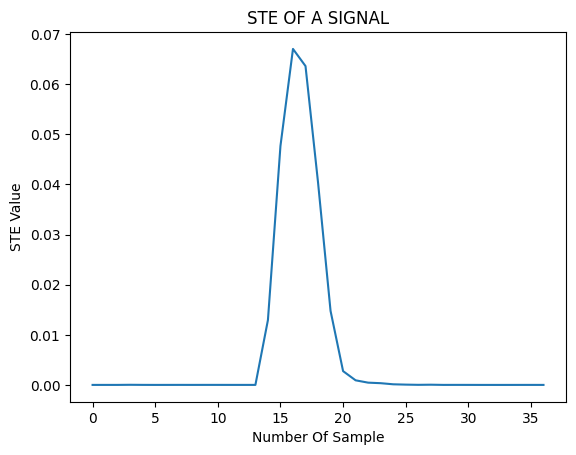

In [35]:
plt.plot(np.arange(len(ste_value)), ste_value)
plt.xlabel("Number Of Sample")
plt.ylabel("STE Value")
plt.title("STE OF A SIGNAL")

0
1


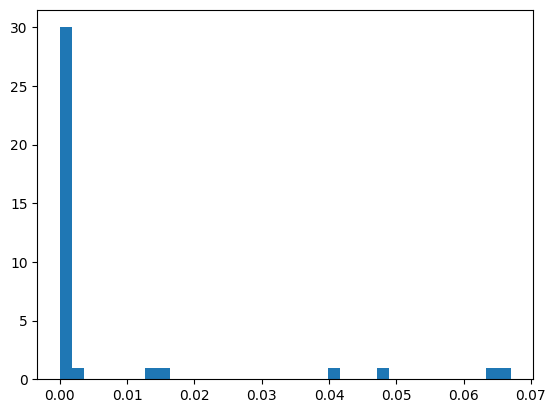

In [36]:
n, bins, patches = plt.hist(ste_value, bins= len(ste_value))
m1 = argmax(n)
np.delete(n, m1)
m2= argmax(n) + 1
print(m1)
print(m2)

In [37]:
all_directories = iterator_for_all_sub_directories(SAMPLE_DIR)

In [38]:
histogram_values = []

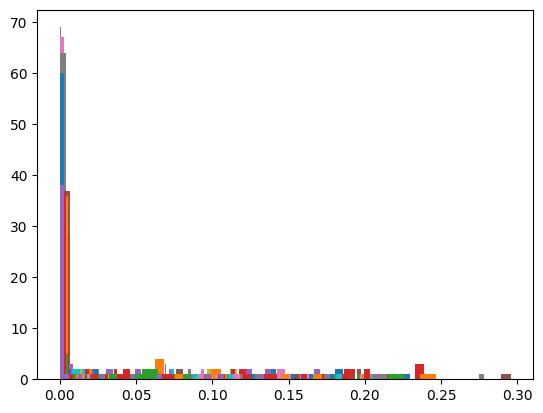

In [39]:
for directory in all_directories:
    for file in all_directories[directory]:
        sample_rate, signal = wavfile.read(file)
        normalized_signal = signal / np.max(signal)
        frame_size = int(0.03 * sample_rate)
        ste_value = voice_segment(normalized_signal, frame_size, "short_term_energy")
        n, bins, patches = plt.hist(ste_value, bins= len(ste_value))
        m1 = argmax(n)
        np.delete(n, m1)
        m2= argmax(n) + 1
        histogram_values.append(histogram_function(100, m1, m2))

In [40]:
print(np.mean(histogram_values))

0.0099009900990099
